In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12
df = pd.read_csv('D:\Project 2-1 gui\carmadness\data_clean_NoNaN.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)


In [33]:
df['Price'] = df['Price'].str.replace('[^0-9]', '', regex=True)
df['Price'] = df['Price'].replace('', np.nan)
df = df.dropna(subset=['Price'])
df['Price'] = pd.to_numeric(df['Price'])
df

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,Body,province
1,Fiat Doblo Cargo 1.9 JTD Grijs Kenteken Bestel...,I Boumans,18500,Gennep,2005,199.313 km,Diesel,Handgeschakeld,NaN,Limburg
2,Ford Ranger Open-laadbak 2.2TDCI 160PK Dubbele...,DUTCH Vans,22600,Barneveld,2017,107.195 km,Diesel,Handgeschakeld,NaN,Gelderland
3,Aixam Roadline -2008- incl. 3 mnd garantie + o...,Garage Kaal & Buunk,6950,Beek,2008,47.108 km,Diesel,Automaat,NaN,Limburg
4,Audi A3 S-Line Sportback Facelift 2013 Wit,Jeroen,11000,Lent,2013,201.500 km,NaN,NaN,NaN,Gelderland
5,Mercedes-Benz Sprinter 314CDI 143pk L2H2 Koelw...,Van der Wal Vans,32900,Langerak,2018,148.939 km,Diesel,Handgeschakeld,NaN,Drenthe
...,...,...,...,...,...,...,...,...,...,...
13391,Renault Trafic L2 H1 2021 €344 per maand,Action Lease,24700,Heel Nederland,2021,67.051 km,Diesel,Handgeschakeld,NaN,In every province
13392,Renault Master L3 H1 2022 €635 per maand,Action Lease,41800,Heel Nederland,2022,60 km,Diesel,Handgeschakeld,NaN,In every province
13393,Iveco Daily L2 H2 2022 €648 per maand,Action Lease,42600,Heel Nederland,2022,30 km,Diesel,Automaat,NaN,In every province
13394,Volkswagen Crafter L2 H2 2017 €247 per maand,Action Lease,17600,Heel Nederland,2017,198.504 km,Diesel,Handgeschakeld,NaN,In every province


As seen below there are some very large values as a car sale but the mean is much smaller than this therefore we will look at the percentage of total sales compared to how many listings are above 100k.

In [34]:
df["Price"].describe()

count    1.300600e+04
mean     1.898329e+04
std      8.819603e+04
min      0.000000e+00
25%      3.950000e+03
50%      1.290000e+04
75%      2.290000e+04
max      5.749999e+06
Name: Price, dtype: float64

In [29]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a winsorized data frame with outliers removed
    """
    return data.loc[(data[variable] > lower) & (data[variable] < upper)]


df = remove_outliers(df, 'Price', lower=500, upper=100000)

In [30]:
df["Price"].describe()


count    10504.000000
mean     19493.779608
std      15221.161209
min       1028.000000
25%       8900.000000
50%      15900.000000
75%      24995.000000
max      99995.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Count'>

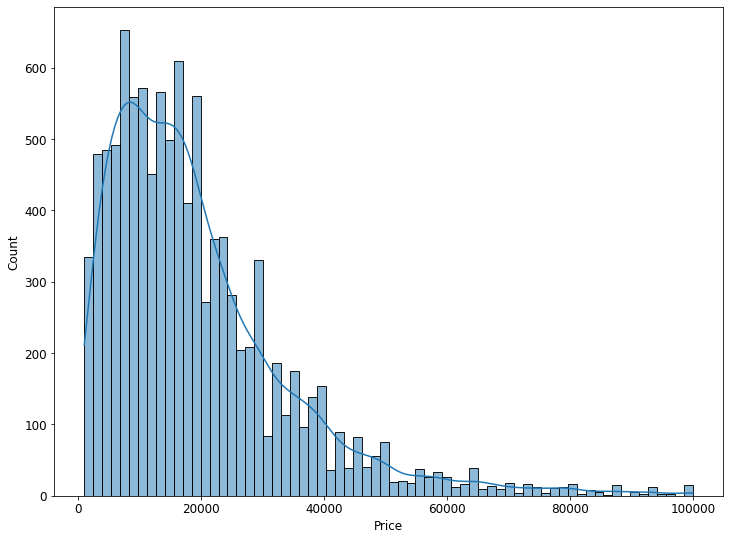

In [31]:
sns.histplot(
   df["Price"],
    kde=True,
)